# Equation Solving Tools

We can solve systems of equations exactly using sympy’s `solve` function. This is usually done using what is known as the residual form. The residual is simply the difference between the LHS and RHS of an equation, or put another way, we rewrite our equations to be equal to zero:

$$ \begin{align}
x + y &= z \\
\therefore x + y - z &= 0
\end{align}
$$

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

In [2]:
x, y, z = sympy.symbols('x, y, z')
sympy.solve(x + y - z, z)

In [3]:
equations = [x + y - z,
            2*x+y +z +2,
            x - y -z +2,]
unknowns = [x, y, z]

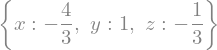

In [4]:
solution = sympy.solve(equations, unknowns)
solution

In [5]:
%%timeit
sympy.solve(equations, unknowns)

4.32 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
solution[x]

In [7]:
# floating point version
solution[x].n()

### 9.2 Special Case: Linear System

For linear systems like the one above, we can solve very efficiently using matrix algebra. The system of equations can be rewritten in matrix form:

$$ Ax = b$$

In [8]:
equations

In [9]:
A = sympy.Matrix([[1, 1, -1],
                  [2, 1, 1],
                  [1, -1, -1]])
b = sympy.Matrix([[0, -2, -2]]).T

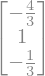

In [10]:
A.solve(b)

CPU times: total: 0 ns
Wall time: 3 ms


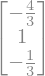

In [11]:
%%time
A.solve(b)

In [12]:
import numpy

In [14]:
A = numpy.matrix([[1, 1, -1],
                  [2, 1, 1],
                  [1, -1, -1]])
b = numpy.matrix([[0, -2, 2]]).T

In [15]:
numpy.linalg.solve(A, b)

matrix([[ 0.],
        [-1.],
        [-1.]])

In [17]:
%%time
numpy.linalg.solve(A, b)

CPU times: total: 0 ns
Wall time: 0 ns


matrix([[ 0.],
        [-1.],
        [-1.]])

In [19]:
N = 30
bigA = numpy.random.random((N, N))

In [20]:
bigB = numpy.random.random((N,))

In [21]:
%%timeit
numpy.linalg.solve(bigA, bigB)

75.6 µs ± 43.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
bigsymbolicA = sympy.Matrix(bigA)

In [26]:
bigsymbolicb = sympy.Matrix(bigB)

In [27]:
%%timeit
bigsymbolicA.solve(bigsymbolicb)

840 ms ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
